In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# Configurando a seed para reprodutibilidade
np.random.seed(42)

# Gerando dados falsos
categorias = ['Eletrônicos', 'Roupas', 'Alimentos', 'Livros', 'Brinquedos']
datas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
num_registros = len(datas)

# Criando DataFrame
data = {
    'Data': np.random.choice(datas, num_registros),
    'Categoria': np.random.choice(categorias, num_registros),
    'Quantidade_Vendida': np.random.randint(1, 100, num_registros),
    'Preco_Unitario': np.round(np.random.uniform(10, 500, num_registros), 2)
}
df = pd.DataFrame(data)
df['Valor_Total'] = df['Quantidade_Vendida'] * df['Preco_Unitario']

# Salvando o DataFrame em um arquivo CSV
df.to_csv('dados_vendas.csv', index=False)

print("Conjunto de dados gerado e salvo como 'dados_vendas.csv'.")

Conjunto de dados gerado e salvo como 'dados_vendas.csv'.


In [39]:
# 1. **Carregar os dados:**
df = pd.read_csv('dados_vendas.csv',sep=',',index_col=False)
df

,Data,Categoria,Quantidade_Vendida,Preco_Unitario,Valor_Total
0,2023-04-13,Roupas,74,60.43,4471.82
1,2023-12-15,Alimentos,83,272.88,22649.04
2,2023-09-28,Roupas,17,195.62,3325.54
3,2023-04-17,Roupas,85,233.93,19884.05
4,2023-03-13,Roupas,78,305.94,23863.32
...,...,...,...,...,...
360,2023-10-07,Brinquedos,66,12.49,824.34
361,2023-04-24,Brinquedos,10,350.90,3509.00
362,2023-10-15,Brinquedos,5,33.90,169.50
363,2023-12-08,Brinquedos,74,270.98,20052.52


In [40]:
# 2. **Pergunta 1: Quantas linhas e colunas existem no DataFrame carregado?**
#365 linhas e 5 colunas
df.shape

(365, 5)

In [41]:
# 3. **Pergunta 2: Quais são os tipos de dados (dtypes) das colunas?**
# Objeto, ponto fluante e inteiro
df.dtypes.reset_index()

,index,0
0,Data,object
1,Categoria,object
2,Quantidade_Vendida,int64
3,Preco_Unitario,float64
4,Valor_Total,float64


In [42]:
# 4. **Exibir as primeiras 5 linhas do DataFrame:**
# roupas = 0,2,3,4
# alimentos = 1
df.head()

,Data,Categoria,Quantidade_Vendida,Preco_Unitario,Valor_Total
0,2023-04-13,Roupas,74,60.43,4471.82
1,2023-12-15,Alimentos,83,272.88,22649.04
2,2023-09-28,Roupas,17,195.62,3325.54
3,2023-04-17,Roupas,85,233.93,19884.05
4,2023-03-13,Roupas,78,305.94,23863.32


In [43]:
# 5. **Pergunta 3: Quantas categorias únicas de produtos estão presentes no DataFrame?**
#    - Utilize a função `unique` na coluna 'Categoria' para responder.
# As categorias unicas são: Roupas, Alimentos, Eletrônicos, Brinquedos, Livros
df_categoria_unico = pd.unique(df['Categoria'])
df_categoria_unico

array(['Roupas', 'Alimentos', 'Eletrônicos', 'Brinquedos', 'Livros'],
      dtype=object)

In [44]:
# 6. **Filtrar os dados para mostrar apenas as vendas da categoria 'Eletrônicos':**
# Houve 73 vendas da categoria "Eletrônicos"
eletronicos = (df['Categoria'] == 'Eletrônicos')
df[eletronicos]

,Data,Categoria,Quantidade_Vendida,Preco_Unitario,Valor_Total
5,2023-07-08,Eletrônicos,73,256.12,18696.76
6,2023-01-21,Eletrônicos,1,274.53,274.53
7,2023-04-13,Eletrônicos,51,248.32,12664.32
14,2023-06-01,Eletrônicos,34,303.52,10319.68
18,2023-09-15,Eletrônicos,39,121.40,4734.60
...,...,...,...,...,...
347,2023-09-10,Eletrônicos,33,431.46,14238.18
349,2023-09-13,Eletrônicos,27,201.67,5445.09
351,2023-05-08,Eletrônicos,29,243.57,7063.53
353,2023-10-08,Eletrônicos,57,427.57,24371.49


In [45]:
# 7. **Pergunta 4: Qual é a média do valor total das vendas na categoria 'Eletrônicos'?**
#    - Utilize a média na coluna 'Valor_Total' do DataFrame filtrado.
# A média do valor total das vendas na categoria Eletrônicos é 12291.26
eletronicos = df['Categoria'] == 'Eletrônicos'
media_eletronicos = df[['Quantidade_Vendida','Preco_Unitario','Valor_Total']][eletronicos].mean()
media_eletronicos.reset_index()

,index,0
0,Quantidade_Vendida,46.780822
1,Preco_Unitario,267.357671
2,Valor_Total,12291.256301


In [46]:
# 8. **Filtrar as vendas acima de R$ 1000:**
#    ```python
#    vendas_acima_1000 = df[df['Valor_Total'] > 1000]
#    print(vendas_acima_1000)
#    ```
# Houve 330 vendas com o valor total acima de 1000
vendas_maior_1000 = df['Valor_Total'] > 1000
df[vendas_maior_1000]

,Data,Categoria,Quantidade_Vendida,Preco_Unitario,Valor_Total
0,2023-04-13,Roupas,74,60.43,4471.82
1,2023-12-15,Alimentos,83,272.88,22649.04
2,2023-09-28,Roupas,17,195.62,3325.54
3,2023-04-17,Roupas,85,233.93,19884.05
4,2023-03-13,Roupas,78,305.94,23863.32
...,...,...,...,...,...
358,2023-12-26,Brinquedos,68,147.88,10055.84
359,2023-06-23,Alimentos,86,133.80,11506.80
361,2023-04-24,Brinquedos,10,350.90,3509.00
363,2023-12-08,Brinquedos,74,270.98,20052.52


In [47]:
# 9.  **Pergunta 5: Quantas vendas acima de R$ 1000 ocorreram?**
#    - Utilize a função `len` ou `shape` para descobrir a quantidade de registros.
# Houve 330 vendas com o valor total acima de 1000
tamanho = len(df[vendas_maior_1000])
print(f'Valor total de vendas maior que mil: {tamanho}')
df[vendas_maior_1000].shape

Valor total de vendas maior que mil: 330


(330, 5)

In [48]:
# ### **Parte 3: Agrupamento e Agregação**

# 1. **Agrupar os dados por categoria e calcular o total de vendas por categoria:**
total_categoria = df.groupby('Categoria')['Valor_Total'].sum().reset_index()
total_categoria

,Categoria,Valor_Total
0,Alimentos,742457.74
1,Brinquedos,1187964.04
2,Eletrônicos,897261.71
3,Livros,963685.46
4,Roupas,991215.29


In [49]:
# 2. **Pergunta 6: Qual categoria teve o maior valor total de vendas?**
# Brinquedos é a categoria com o maior valor total de vendas = R$118.7964,04
soma_valor_categoria = df.groupby('Categoria')['Valor_Total'].sum()
max_valor_categoria = df.groupby('Categoria')['Valor_Total'].sum().max()
resultado = soma_valor_categoria ==  max_valor_categoria
soma_valor_categoria[resultado].reset_index()

,Categoria,Valor_Total
0,Brinquedos,1187964.04


In [50]:
# 3. **Calcular a quantidade média vendida por categoria:**
media_qtd_categoria = df.groupby('Categoria')['Quantidade_Vendida'].mean().reset_index()
media_qtd_categoria

,Categoria,Quantidade_Vendida
0,Alimentos,55.618182
1,Brinquedos,47.247191
2,Eletrônicos,46.780822
3,Livros,50.917808
4,Roupas,47.200000


In [51]:
# 4. **Pergunta 7: Qual categoria teve a maior quantidade média vendida?**
# alimetos é a categoria que teve a maior qtd media vendida
categoria_qtd_vendidas = df.groupby('Categoria')['Quantidade_Vendida'].mean()
resultado = categoria_qtd_vendidas[df.groupby('Categoria')['Quantidade_Vendida'].mean() == df.groupby('Categoria')['Quantidade_Vendida'].mean().max()].reset_index()
resultado

,Categoria,Quantidade_Vendida
0,Alimentos,55.618182


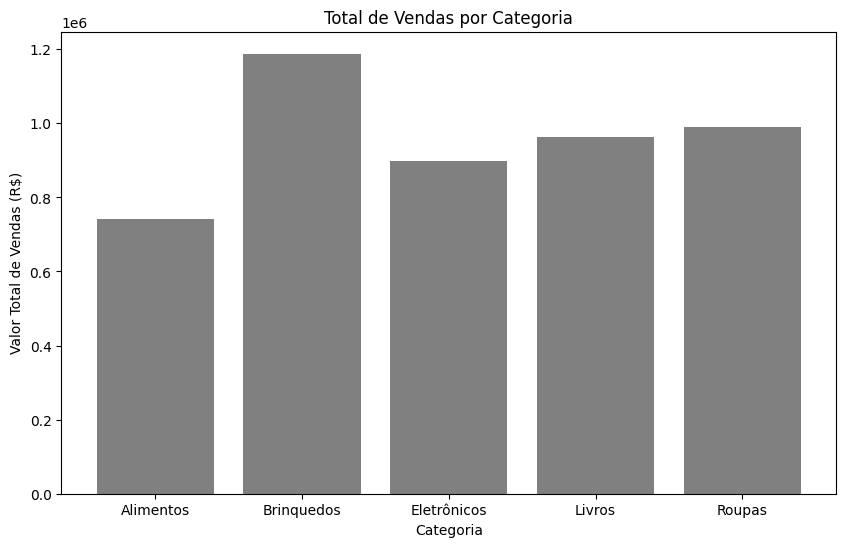

In [52]:
# ### **Parte 4: Visualização de Dados**

# 1. **Criar um gráfico de barras mostrando o total de vendas por categoria:**
plt.figure(figsize=(10, 6))
plt.bar(total_categoria['Categoria'], total_categoria['Valor_Total'], color='gray')
plt.xlabel('Categoria')
plt.ylabel('Valor Total de Vendas (R$)')
plt.title('Total de Vendas por Categoria')
plt.show()

##### 2. **Pergunta 8: Com base no gráfico, qual categoria visualmente se destaca em termos de vendas totais?**
Comprovando os resultados que obtivemos na análise da pergunta 2. **Pergunta 6: Brinquedos. Foi a categoria com o maior valor de vendas, seguido por roupas, livros, eletopnicos e alimentos

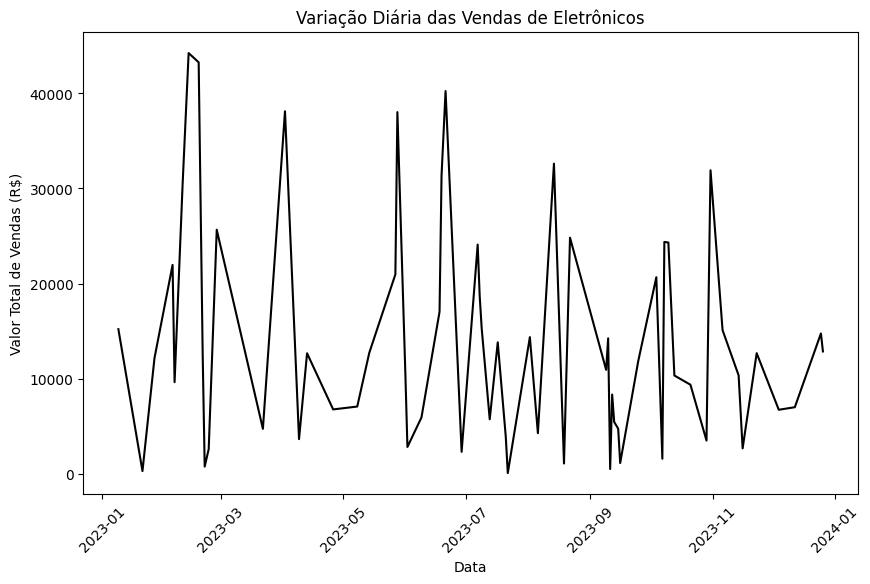

In [53]:
# 3. **Criar um gráfico de linha mostrando a variação diária das vendas de 'Eletrônicos':**

df['Data'] = pd.to_datetime(df['Data'])

vendas_diarias = df[eletronicos].groupby('Data')['Valor_Total'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(vendas_diarias['Data'], vendas_diarias['Valor_Total'], color='black')
plt.xlabel('Data')
plt.ylabel('Valor Total de Vendas (R$)')
plt.title('Variação Diária das Vendas de Eletrônicos')
plt.xticks(rotation=45)
plt.show()

##### No grafico podemos analisar a alta variacao das vendas nos diferentes dias. Essa alta variação é explicado por um alto desvido padrao, destoando bastante entre a media, os pontos minimos e maximos de valor todal de vendas

In [54]:
vendas_diarias.describe()

,Data,Valor_Total
count,64,64.000000
mean,2023-07-09 18:45:00,14019.714219
min,2023-01-09 00:00:00,66.900000
25%,2023-04-22 18:00:00,4731.275000
50%,2023-07-15 00:00:00,12014.900000
75%,2023-09-27 06:00:00,20737.762500
max,2023-12-26 00:00:00,44232.760000
std,NaN,11616.290999
